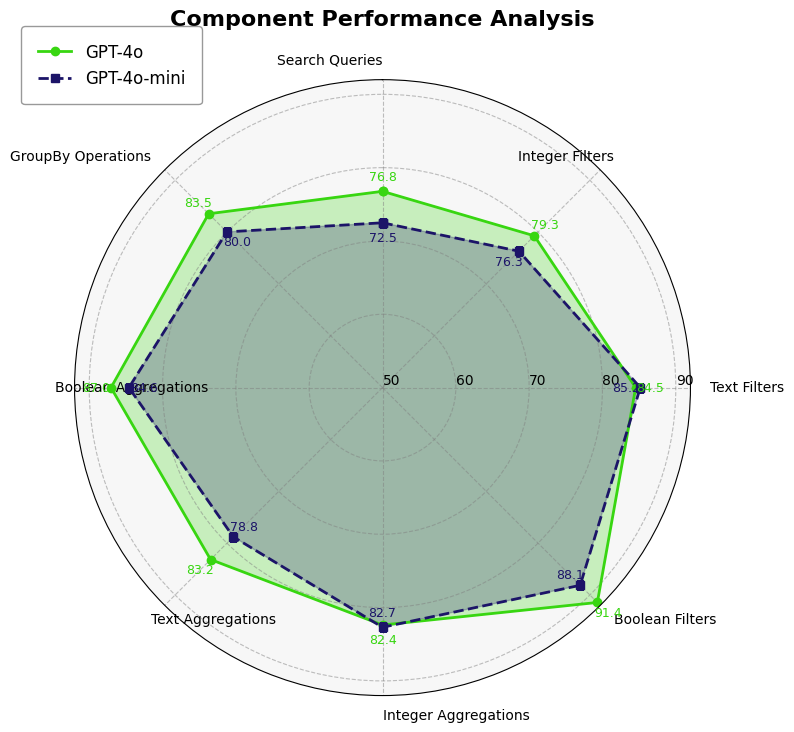

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
categories = ['Search Queries', 'Integer Filters', 'Text Filters', 
              'Boolean Filters', 'Integer Aggregations', 'Text Aggregations',
              'Boolean Aggregations', 'GroupBy Operations']
gpt4o_values = [89.77, 79.28, 84.53, 91.44, 82.38, 83.16, 87.03, 83.53]
gpt4o_mini_values = [85.48, 76.31, 85.16, 88.13, 82.69, 78.78, 84.59, 80.03]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Complete the loop for plotting
gpt4o_values += gpt4o_values[:1]
gpt4o_mini_values += gpt4o_mini_values[:1]

# Set up the figure with white background
fig = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig.add_subplot(111, projection='polar')
ax.set_facecolor('#f7f7f7')

# Set colors
gpt4o_color = '#38d611'        # Original color for GPT-4o
gpt4o_mini_color = '#1c1468'   # Original color for GPT-4o-mini

# Plot data with improved styles
ax.plot(angles, gpt4o_values, marker='o', linestyle='solid', linewidth=2, label='GPT-4o', color=gpt4o_color)
ax.fill(angles, gpt4o_values, alpha=0.25, color=gpt4o_color)
ax.plot(angles, gpt4o_mini_values, marker='s', linestyle='dashed', linewidth=2, label='GPT-4o-mini', color=gpt4o_mini_color)
ax.fill(angles, gpt4o_mini_values, alpha=0.25, color=gpt4o_mini_color)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Set the labels for each axis with adjusted rotation
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    angle_deg = np.degrees(angle)
    if angle_deg >= 90 and angle_deg <= 270:
        label.set_horizontalalignment('left')
        label.set_rotation(angle_deg + 180)
    else:
        label.set_horizontalalignment('right')
        label.set_rotation(angle_deg)

# Set chart minimum and maximum radius
ax.set_ylim(50, 92)

# Add gridlines with improved aesthetics
ax.set_rgrids(range(50, 93, 10), angle=90)
ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.5)
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.5)

# Add data labels
for i in range(num_vars):
    angle = angles[i]
    value = gpt4o_values[i]
    ax.text(angle, value + 2, f"{value:.1f}", color=gpt4o_color, fontsize=9, ha='center', va='center')
    
    value_mini = gpt4o_mini_values[i]
    ax.text(angle, value_mini - 2, f"{value_mini:.1f}", color=gpt4o_mini_color, fontsize=9, ha='center', va='center')

# Add legend in top left with improved style
ax.legend(loc='upper left', 
         bbox_to_anchor=(-0.1, 1.1),
         fontsize=12,
         frameon=True,
         edgecolor='grey',
         borderpad=1)

plt.title('Component Performance Analysis', pad=20, size=16, fontweight='bold')
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('component_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('component_analysis.pdf', bbox_inches='tight')  # Vector format for highest quality
plt.show()